In [8]:
from netpyne import specs, sim
import random
from itertools import repeat

# weight params
ampaweightpr = 0.00008
ampaweight = 0.000065
ampaweightin = 0.000085
gabaweight = 0.00083
gabaweightb = gabaweight*0.35
gabaweightcrcb = 0.0083*0.25
gabaweightcb = 0.0006*1.5
gabaweightcr = 0.00087*3
autogabaweight = 0.0073*0.35
nmdaweight = ampaweight*21.5
nmdaweightin = ampaweightin*0.52
ampaweightcb = 0.000029
nmdaweightcb = ampaweightcb*0.86
ampaweightcr = 0.000046
nmdaweightcr = ampaweightcr*2.2

# number of synapses
inmaxsyn = 120          # initial stim
maxsyn = 24             # PC-PC
automaxsyn = 8          # autapses
maxsyn1 = 1             # IN-IN
maxsyn2 = 12            # PC-IN 
maxsyn3 = 15            # IN-PC soma
maxsyn4 = 15            # IN-PC dend1
maxsyn5 = 14            # PC-CB
maxsyn6 = 7             # PC-CR
maxsyn7 = 2             # CR-CB
maxsyn8 = 12            # CB-PC
maxsyn9 = 10            # CR-PC

# number of cells
pcells = 16
fscells = 2
rscells = 1
iscells = 1

netParams = specs.NetParams()  # object of class NetParams to store the network parameters
simConfig = specs.SimConfig()

netParams.popParams['PYR_pop'] = {'cellModel': 'PYR_cell', 'cellType': 'PYR',  'numCells': pcells}
netParams.popParams['FSin_pop'] = {'cellModel': 'FS_cell', 'cellType': 'FSin',  'numCells': fscells}
netParams.popParams['RSin_pop'] = {'cellModel': 'RS_cell', 'cellType': 'RSin',  'numCells': rscells}
netParams.popParams['ISin_pop'] = {'cellModel': 'IS_cell', 'cellType': 'ISin',  'numCells': iscells}

netParams.importCellParams(
        label='PYR',
        conds={'cellType': 'PYR', 'cellModel': 'PYR_cell'},
        fileName='pfc_pc_temp.hoc',
        cellName='Pcell',
        importSynMechs=True)

netParams.importCellParams(
        label='FSin',
        conds={'cellType': 'FSin', 'cellModel': 'FS_cell'},
        fileName='incell.hoc',
        cellName='INcell',
        importSynMechs=True)

netParams.importCellParams(
        label='RSin',
        conds={'cellType': 'RSin', 'cellModel': 'RS_cell'},
        fileName='cb.hoc',
        cellName='CBcell',
        importSynMechs=True)

netParams.importCellParams(
        label='ISin',
        conds={'cellType': 'ISin', 'cellModel': 'IS_cell'},
        fileName='cr.hoc',
        cellName='CRcell',
        importSynMechs=True)

print(netParams.cellParams.keys())

netParams.synMechParams['AMPA'] = {'mod': 'GLU'}
netParams.synMechParams['AMPAIN'] = {'mod': 'GLUIN'}
netParams.synMechParams['GABAA'] = {'mod': 'GABAa'}
netParams.synMechParams['GABAIN'] = {'mod': 'GABAain'}
netParams.synMechParams['NMDA'] = {'mod': 'NMDA'}
netParams.synMechParams['NMDAIN'] = {'mod': 'NMDAIN'}
netParams.synMechParams['GABAB'] = {'mod': 'GABAb'}

netParams.defaultThreshold = -20

# autapses
# ampa random seed = 3, nmda random seed = 124
# netParams.connParams['autapses'] = {
#         'preConds': {'pop': 'PYR_pop'},
#         'postConds': {'pop': 'PYR_pop'},
#         'sec': 'dend_0',
#         'synMech': ['AMPA', 'NMDA'],
#         # 'weight': list(repeat([list(repeat(ampaweight, automaxsyn)), list(repeat(nmdaweight, automaxsyn))], 16)),
#         'weight': list(repeat([ampaweight, nmdaweight], 16)),
#         'synsPerConn': automaxsyn,
#         # 'delay': list(repeat([list(repeat(random.gauss(0.96, 0.11), automaxsyn)),
#         #                         list(repeat(random.gauss(1.33, 0.13), automaxsyn))], 16)),
#         'delay': list(repeat(['normal(0.96, 0.11)', 'normal(1.33, 0.13)'], 16)),
#         # 'delay': list(repeat([ampa_delay, nmda_delay], 16)),
#         'connList': [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9],
#                      [10, 10], [11, 11], [12, 12], [13, 13], [14, 14], [15, 15]]
# }

# -------------------- PC-PC AMPA --------------------
netParams.connParams['PYR->PYR-AMPA'] = {
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'dend_0',
        'synMech': 'AMPA',
        'weight': ampaweight,
        'synsPerConn': maxsyn,
        'delay': 'normal(0.96, 0.11)'
}
# -------------------- PC-PC NMDA --------------------
netParams.connParams['PYR-> PYR-NMDA'] = {
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'dend_0',
        'synMech': 'NMDA',
        'weight': nmdaweight,
        'synsPerConn': maxsyn,
        'delay': 'normal(1.33, 0.13)'
}

# -------------------- IN-IN --------------------
netParams.connParams['FSin->FSin'] = {
        'preConds': {'pop': 'FSin_pop'},
        'postConds': {'pop': 'FSin_pop'},
        'sec': 'soma',
        'synMech': 'GABAAIN',
        'weight': autogabaweight,
        'synsPerConn': maxsyn1,
        'delay': 'normal(1.76, 0.07)'
}

# -------------------- PC-IN AMPAin --------------------
netParams.connParams['PYR->FSin-AMPAin'] = {
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'FSin_pop'},
        'sec': 'dend',
        'synMech': 'AMPAIN',
        'weight': ampaweightin,
        'synsPerConn': maxsyn2,
        'delay': 'normal(0.6, 0.2)'
}
# -------------------- PC-IN NMDAin --------------------
netParams.connParams['PYR->FSin-NMDAin'] = {
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'FSin_pop'},
        'sec': 'dend',
        'synMech': 'NMDAIN',
        'weight': nmdaweightin,
        'synsPerConn': maxsyn2,
        'delay': 'normal(0.6, 0.2)'
}

# -------------------- IN-PC soma GABAa --------------------
netParams.connParams['FSin->PYR-GABAa'] = {
        'preConds': {'pop': 'FSin_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'soma',
        'synMech': 'GABAA',
        'weight': gabaweight,
        'synsPerConn': maxsyn3,
        'delay': 'normal(1.8, 0.8)'
}
# -------------------- IN-PC soma GABAb --------------------
netParams.connParams['FSin->PYR-GABAb'] = {
        'preConds': {'pop': 'FSin_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'soma',
        'synMech': 'GABAB',
        'weight': gabaweightb,
        'synsPerConn': maxsyn3,
        'delay': 'normal(1.8, 0.8)'
}

# -------------------- IN-PC dend1 GABAa --------------------
netParams.connParams['FSin->PYR-GABAa'] = {
        'preConds': {'pop': 'FSin_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'dend_1',
        'synMech': 'GABAA',
        'weight': gabaweight,
        'synsPerConn': maxsyn4,
        'delay': 'normal(1.8, 0.8)'
}
# -------------------- IN-PC dend1 GABAb --------------------
netParams.connParams['FSin->PYR-GABAb'] = {
        'preConds': {'pop': 'FSin_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'dend_1',
        'synMech': 'GABAB',
        'weight': gabaweightb,
        'synsPerConn': maxsyn4,
        'delay': 'normal(1.8, 0.8)'
}

# -------------------- PC-CB AMPAin --------------------
netParams.connParams['PYR->RSin-AMPAin'] = {
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'RSin_pop'},
        'sec': 'dend',
        'synMech': 'AMPAIN',
        'weight': ampaweightcb,
        'synsPerConn': maxsyn5,
        'delay': 'normal(0.6, 0.2)'
}
# -------------------- PC-CB NMDA --------------------
netParams.connParams['PYR->RSin-NMDA'] = {
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'RSin_pop'},
        'sec': 'dend',
        'synMech': 'NMDA',
        'weight': nmdaweightcb,
        'synsPerConn': maxsyn5,
        'delay': 'normal(0.6, 0.2)'
}

# -------------------- PC-CR AMPAin --------------------
netParams.connParams['PYR->ISin-AMPAin'] = {
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'ISin_pop'},
        'sec': 'dend_0',
        'synMech': 'AMPAIN',
        'weight': ampaweightcr,
        'synsPerConn': maxsyn6,
        'delay': 'normal(0.6, 0.2)'
}
# -------------------- PC-CR NMDA --------------------
netParams.connParams['PYR->ISin-NMDA'] = {
        'preConds': {'pop': 'PYR_pop'},
        'postConds': {'pop': 'ISin_pop'},
        'sec': 'dend_0',
        'synMech': 'NMDA',
        'weight': nmdaweightcr,
        'synsPerConn': maxsyn6,
        'delay': 'normal(0.6, 0.2)'
}

# -------------------- CR-CB --------------------
netParams.connParams['ISin->RSin'] = {
        'preConds': {'pop': 'ISin_pop'},
        'postConds': {'pop': 'RSin_pop'},
        'sec': 'dend',
        'synMech': 'GABAA',
        'weight': gabaweightcrcb,
        'synsPerConn': maxsyn7,
        'delay': 'normal(1.8, 0.8)'
}

# -------------------- CB-PC --------------------
netParams.connParams['RSin->PYR'] = {
        'preConds': {'pop': 'RSin_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'dend_2',
        'synMech': 'GABAA',
        'weight': gabaweightcb,
        'synsPerConn': maxsyn8,
        'delay': 'normal(1.8, 0.8)'
}

# -------------------- CR-PC --------------------
netParams.connParams['ISin->PYR'] = {
        'preConds': {'pop': 'ISin_pop'},
        'postConds': {'pop': 'PYR_pop'},
        'sec': 'dend_2',
        'synMech': 'GABAA',
        'weight': gabaweightcr,
        'synsPerConn': maxsyn9,
        'delay': 'normal(1.8, 0.8)'
}

netParams.stimSourceParams['ns1'] = {
        'type': 'NetStim',
        # 'rate': 100,
        'interval': 50,
        'number': 10,
        'start': 0,
        'noise': 0
}
netParams.stimTargetParams['nc1'] = {
        'source': 'ns1',
        'conds': {'cellType': 'PYR', 'cellModel': 'PYR_cell'},
        'synMech': 'AMPA',
        'weight': ampaweightpr,
        'synsPerConn': inmaxsyn,
        'delay': 10,
        'sec': 'dend_1',
        'loc': 'uniform(0,1)'
}
netParams.stimTargetParams['nc2'] = {
        'source': 'ns1',
        'conds': {'cellType': 'PYR', 'cellModel': 'PYR_cell'},
        'synMech': 'NMDA',
        'weight': ampaweightpr*5,
        'synsPerConn': inmaxsyn,
        'delay': 10,
        'sec': 'dend_1',
        'loc': 'uniform(0,1)'
}

SyntaxError: invalid syntax (<ipython-input-8-cec3a9813b6a>, line 117)

In [5]:
simConfig.duration = 1000
simConfig.dt = 0.025
simConfig.verbose = False
simConfig.savePickle = False
simConfig.analysis['plotRaster'] = {'orderInverse': True}
simConfig.analysis['plotTraces'] = {'include': ['PYR_pop', 'FSin_pop', 'RSin_pop', 'ISin_pop']}
simConfig.allowSelfConns=False 
# Recording/plotting parameters
simConfig.recordTraces = {'V_soma':{'sec': 'soma','loc': 0.5,'var': 'v'},
                          'ca_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'cai'},
                         'k_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'ik'},
                         'na_soma': {'sec': 'soma', 'loc': 0.5, 'var': 'ina'},
                         
                         }
simConfig.recordStim = True
simConfig.hParams['celsius']= 34


Start time:  2021-05-27 19:02:26.321249

Creating network of 4 cell populations on 1 hosts...
  Number of cells on node 0: 20 
  Done; cell creation time = 0.11 s.
Making connections...
  Number of connections on node 0: 371 
  Number of synaptic contacts on node 0: 14276 
  Done; cell connection time = 0.44 s.
Adding stims...
  Number of stims on node 0: 3840 
  Done; cell stims creation time = 0.22 s.
Recording 100 traces of 5 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 92.87 s; real-time ratio: 0.01.

Gathering data...
  Done; gather time = 0.61 s.

Analyzing...
  Cells: 20
  Connections: 387 (19.35 per cell)
  Synaptic contacts: 18116 (905.80 per cell)
  Spikes: 2381 (119.05 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 92.87 s
  Done; saving time = 0.02 s.
Plotting raster...


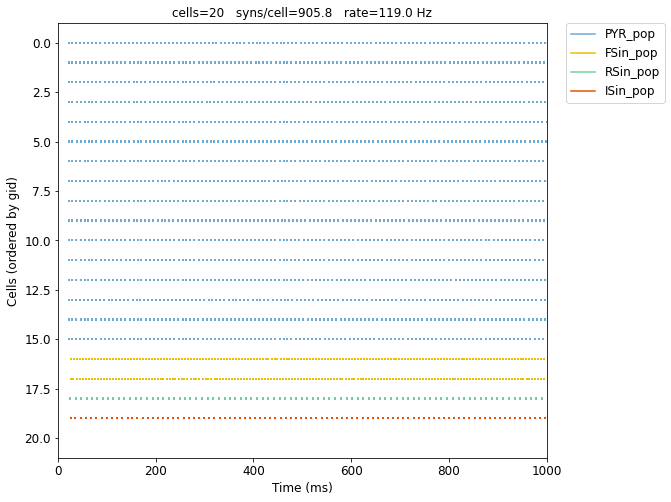

Plotting recorded cell traces ... cell


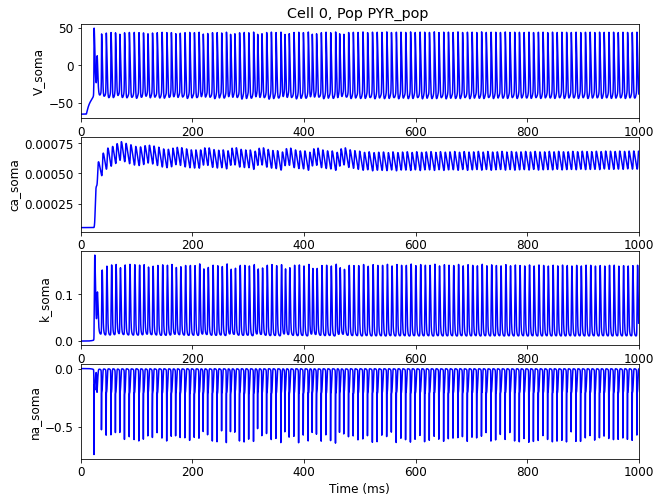

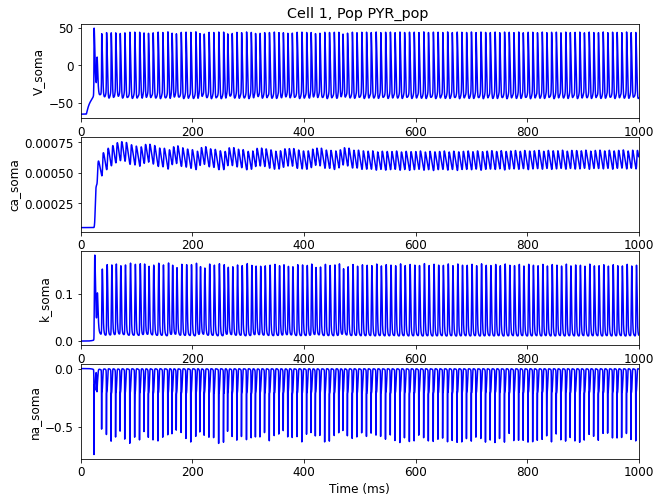

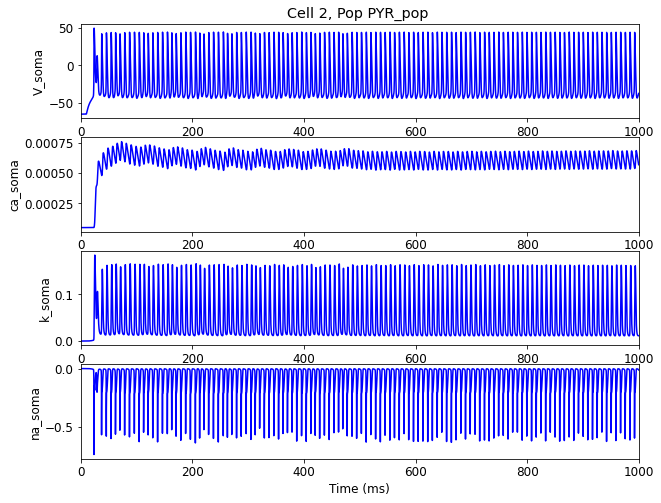

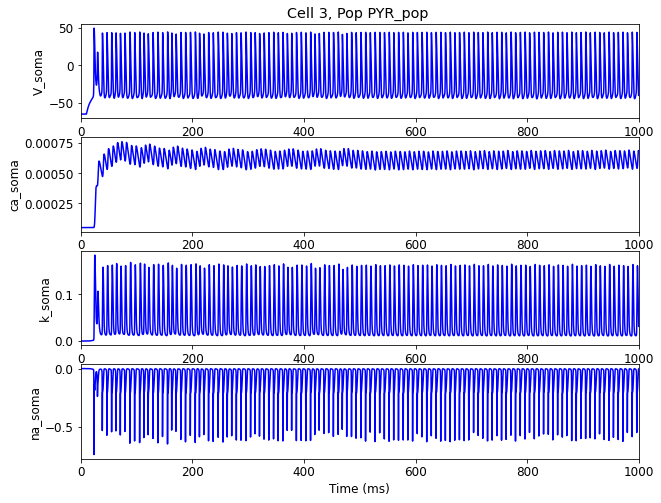

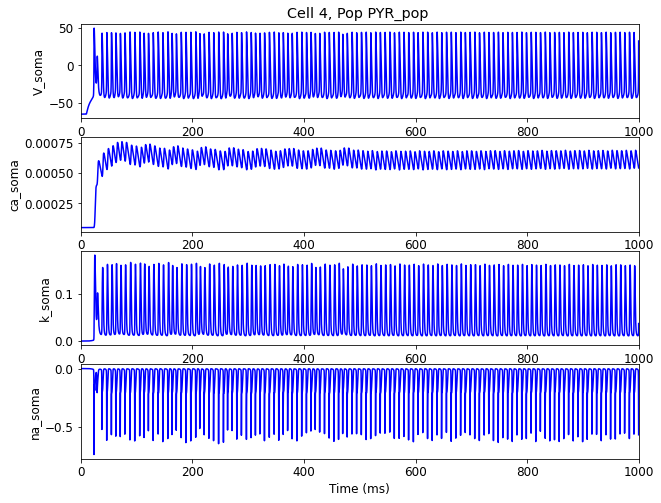

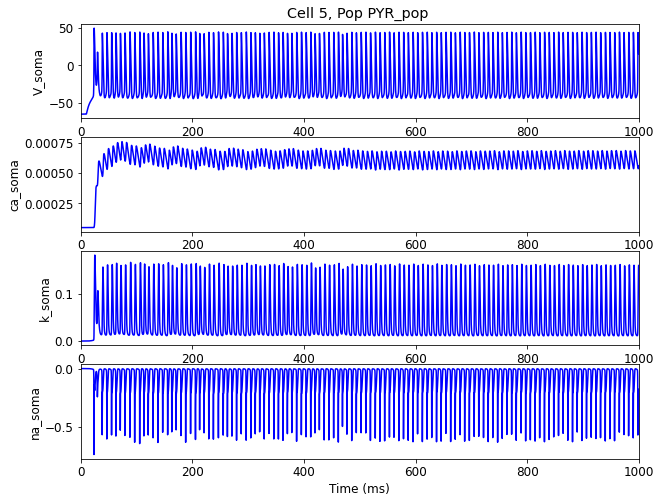

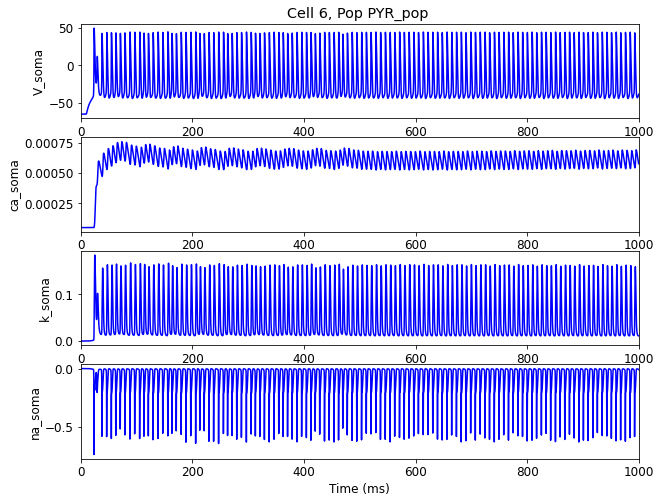

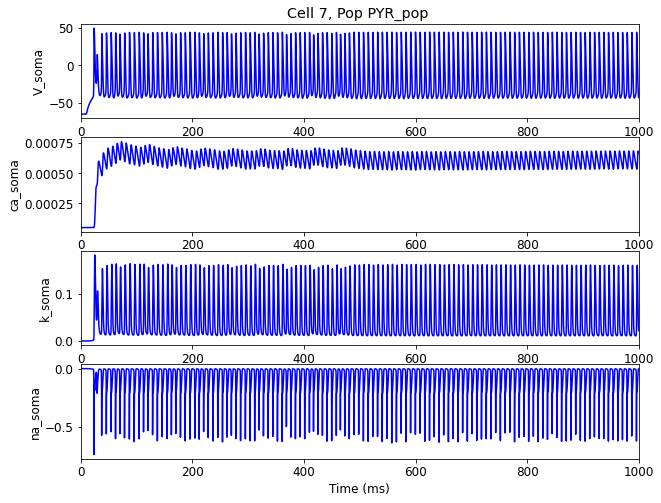

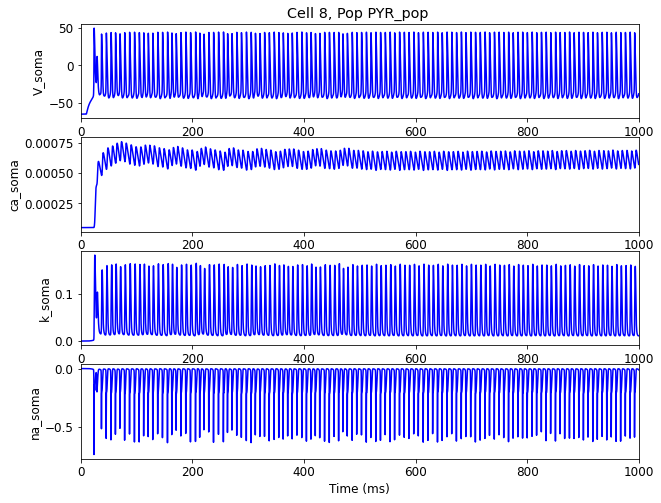

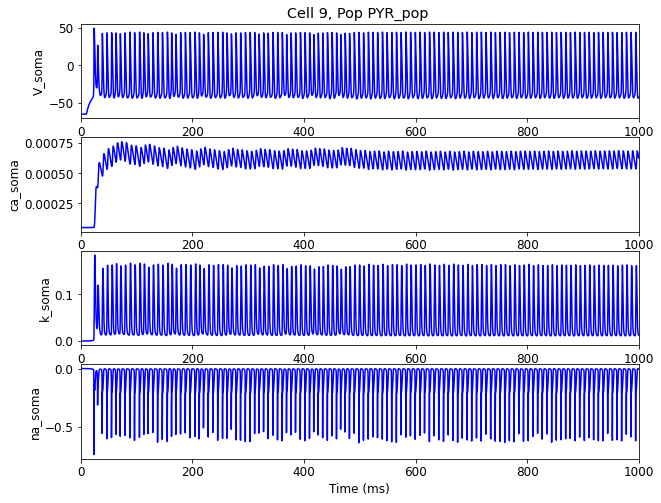

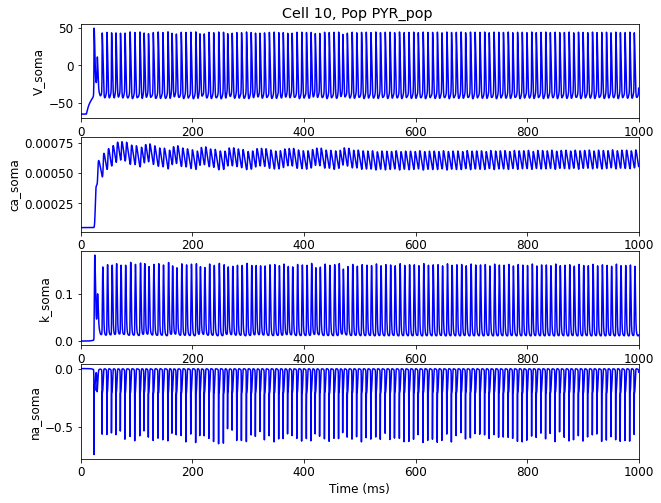

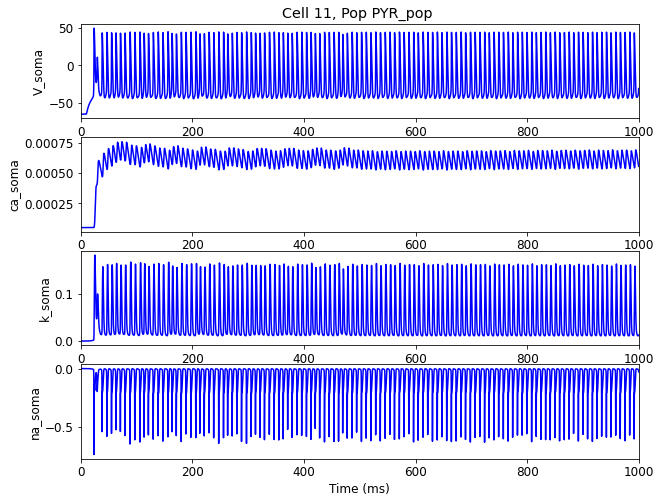

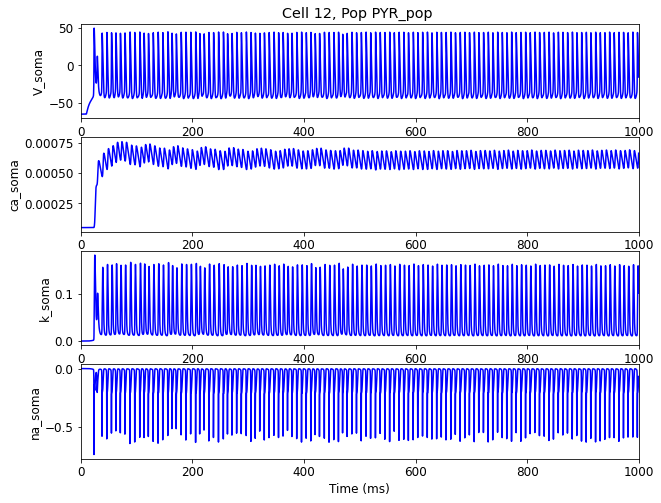

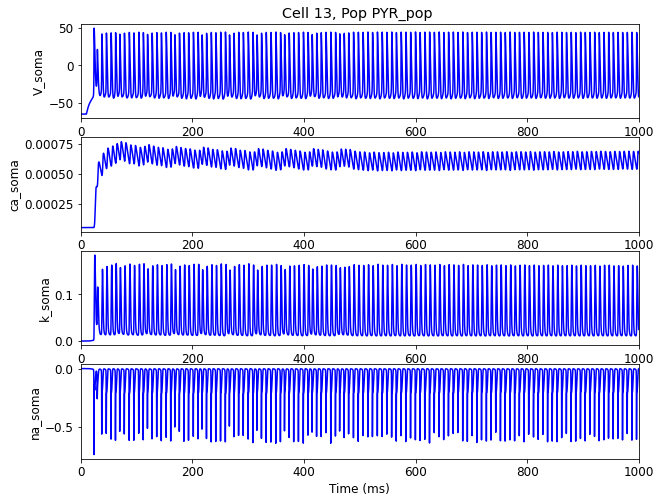

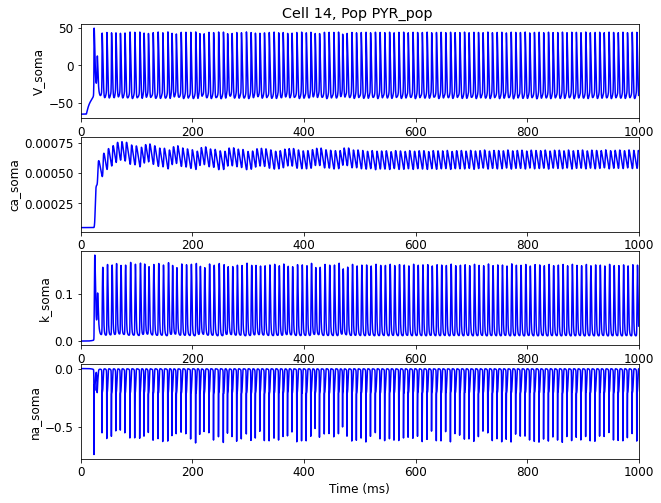

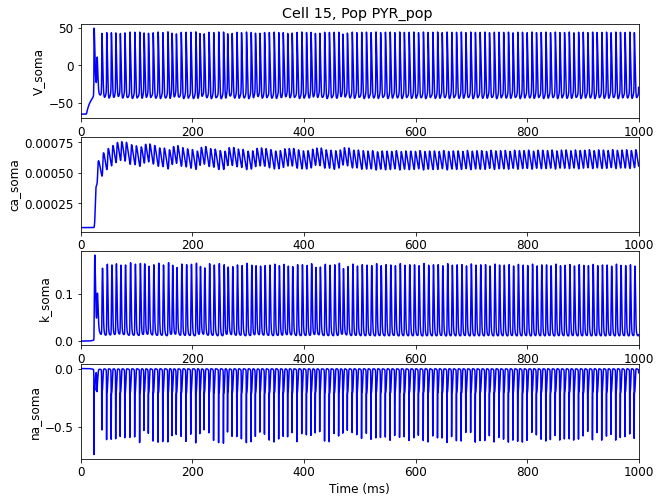

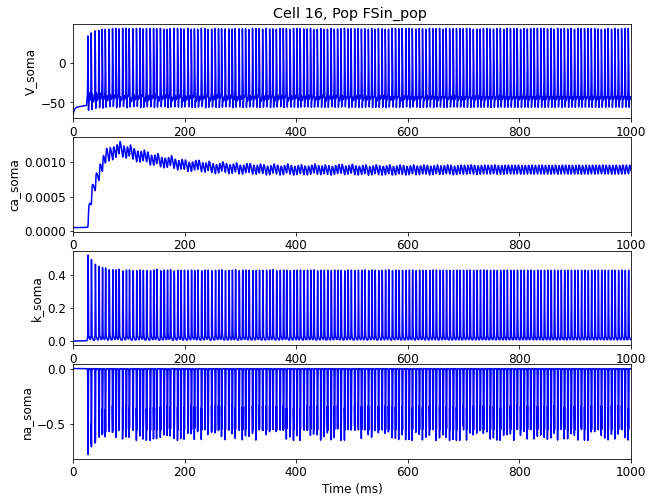

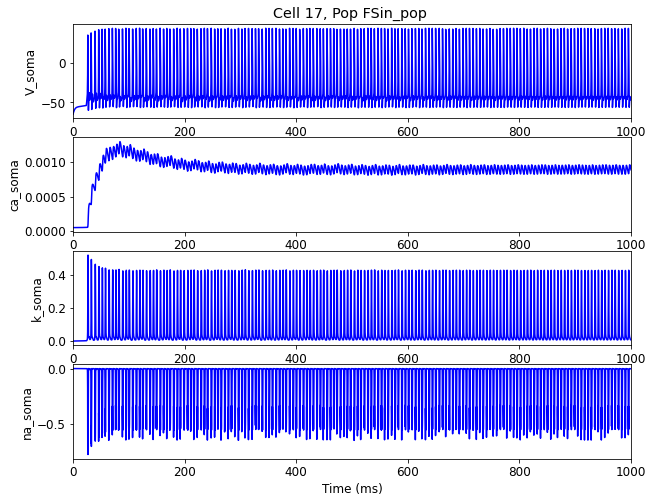

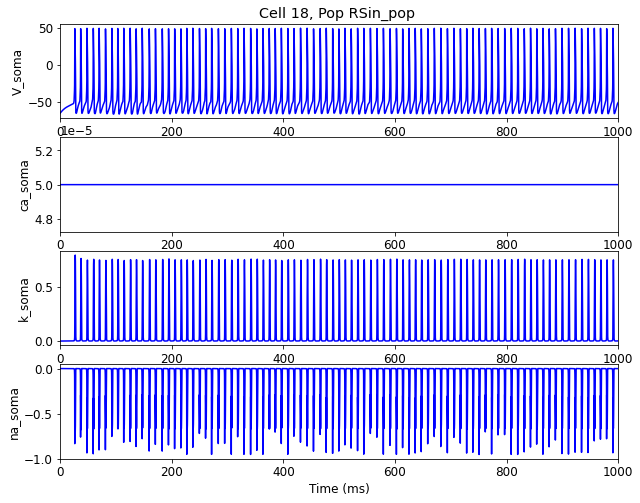

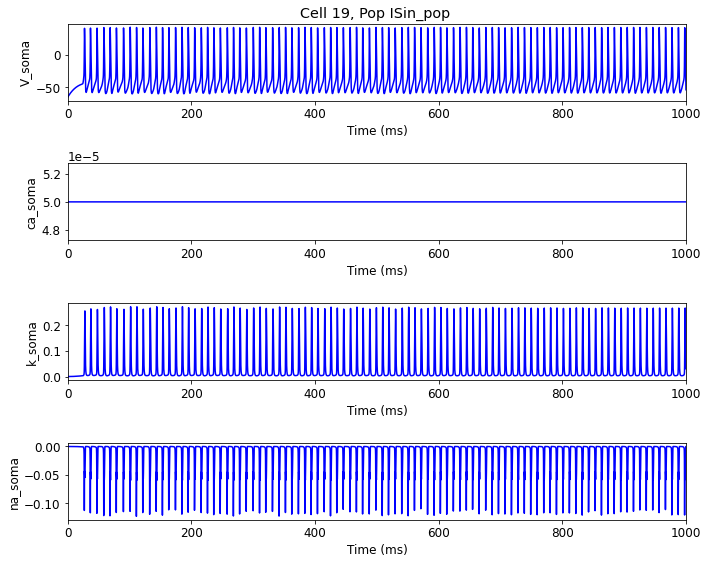

  Done; plotting time = 8.06 s

Total time = 102.38 s

End time:  2021-05-27 19:04:08.697950
Plotting connectivity matrix...


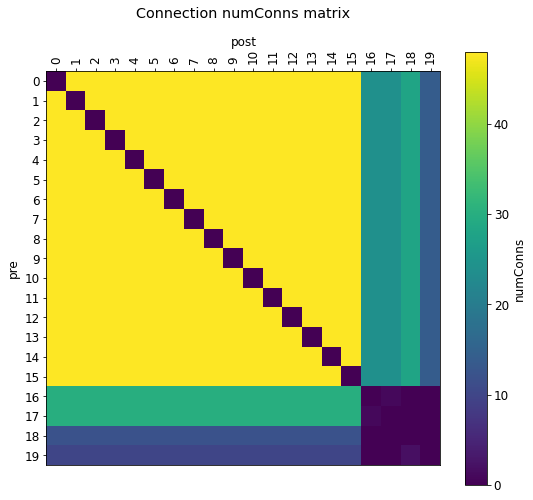

(<Figure size 576x576 with 2 Axes>,
 {'connMatrix': array([[ 0., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48.,
          48., 48., 48., 24., 24., 28., 14.],
         [48.,  0., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48.,
          48., 48., 48., 24., 24., 28., 14.],
         [48., 48.,  0., 48., 48., 48., 48., 48., 48., 48., 48., 48., 48.,
          48., 48., 48., 24., 24., 28., 14.],
         [48., 48., 48.,  0., 48., 48., 48., 48., 48., 48., 48., 48., 48.,
          48., 48., 48., 24., 24., 28., 14.],
         [48., 48., 48., 48.,  0., 48., 48., 48., 48., 48., 48., 48., 48.,
          48., 48., 48., 24., 24., 28., 14.],
         [48., 48., 48., 48., 48.,  0., 48., 48., 48., 48., 48., 48., 48.,
          48., 48., 48., 24., 24., 28., 14.],
         [48., 48., 48., 48., 48., 48.,  0., 48., 48., 48., 48., 48., 48.,
          48., 48., 48., 24., 24., 28., 14.],
         [48., 48., 48., 48., 48., 48., 48.,  0., 48., 48., 48., 48., 48.,
          48., 48., 48., 24.

In [3]:
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)
sim.analysis.plotConn(feature='numConns',groupBy='cell',saveFig='plotConn.png')